In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [2]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
data=pd.concat([df,df_test],axis=0,sort=True)

In [10]:
data.head(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [12]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

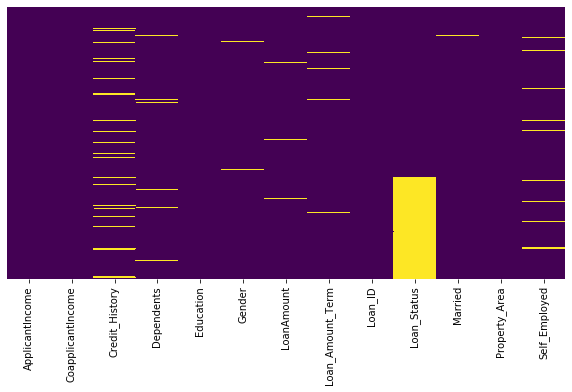

In [13]:
#Plotting the null values 
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False,annot=False,cmap="viridis",cbar=False)

In [14]:
data.Credit_History.unique()

array([ 1.,  0., nan])

In [15]:
data.Credit_History.isnull().sum()

79

In [16]:
data.Gender.isnull().sum()

24

In [17]:
#Hence this data indicates that most of the loan applicants are educated
data.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [18]:
#Most of the loan applicants are married
data.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [19]:
#Since Loan_Status is in categorical form it cannot be utilized well so therefore converting into numeric form by mapping to 0,1
data["Loan_Status"]=data.Loan_Status.map({"Y":1,"N":0})

In [20]:
#Filling in the missing values of married people using mode of the data column
data["Married"].fillna(data.Married.mode()[0],inplace=True)

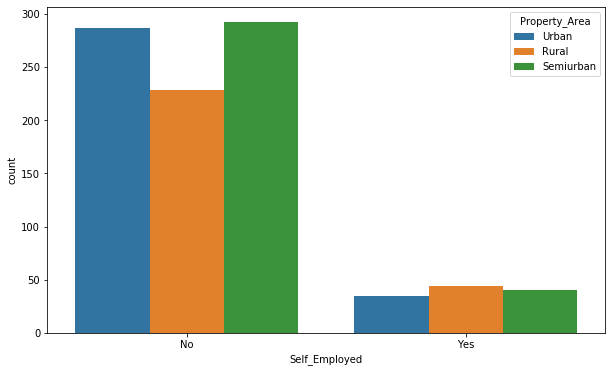

In [21]:
plt.figure(figsize=(10,6))
sns.countplot("Self_Employed",data=data,hue="Property_Area")
#Self_Employed people are mostly from rural background

In [22]:
mode_1=data.Self_Employed.mode()[0]
data.Self_Employed.fillna(mode_1,inplace=True)

In [23]:
mode_2=data.Gender.mode()[0]
data.Gender.fillna(mode_2,inplace=True)

In [24]:
mode_3=data.Credit_History.mode()[0]
data.Credit_History.fillna(mode_3,inplace=True)

In [25]:
data.head(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,1.0,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,0.0,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,1.0,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,1.0,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,1.0,No,Urban,No


In [26]:
data.Dependents.value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [27]:
mode_4=data.Dependents.mode()[0]
data.Dependents.fillna(mode_4,inplace=True)

In [28]:
data.corrwith(data.Loan_Status)

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
Credit_History       0.540556
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Loan_Status          1.000000
dtype: float64

In [29]:
data.corr()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Loan_Status
ApplicantIncome,1.000000,-0.114247,0.020201,0.551811,-0.023089,-0.004710
CoapplicantIncome,-0.114247,1.000000,-0.011531,0.179228,-0.043860,-0.059187
Credit_History,0.020201,-0.011531,1.000000,-0.003637,-0.018782,0.540556
LoanAmount,0.551811,0.179228,-0.003637,1.000000,0.055636,-0.037318
Loan_Amount_Term,-0.023089,-0.043860,-0.018782,0.055636,1.000000,-0.021268
Loan_Status,-0.004710,-0.059187,0.540556,-0.037318,-0.021268,1.000000


(6.0, 0.0)

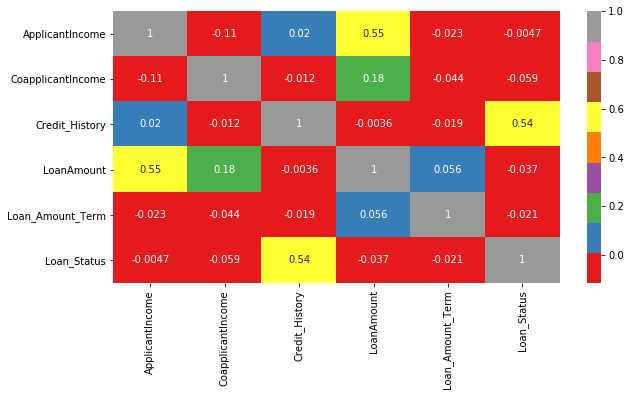

In [30]:
#Finding correlation
plt.figure(figsize=(10,5))
ax=sns.heatmap(data.corr(),cmap="Set1",cbar=True,yticklabels=True,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5,top -0.5)

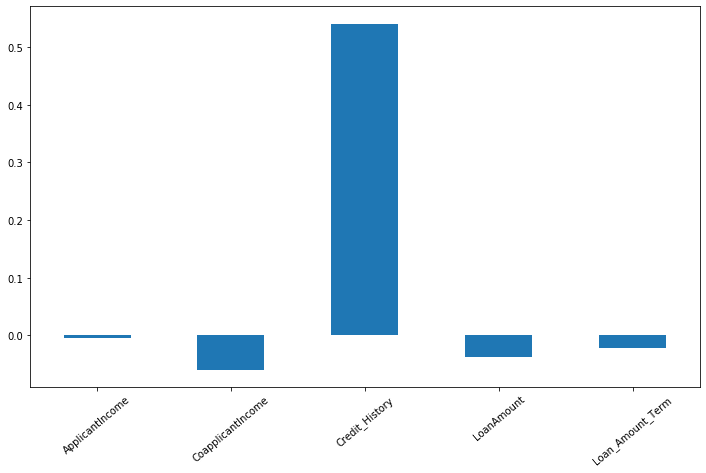

In [31]:
plt.figure(figsize=(12,7))
corr=data.drop("Loan_Status",axis=1).corrwith(data["Loan_Status"])
corr.plot(kind="bar",rot=40)

In [32]:
#It can be seen that the credit_history has the highest correlation with the Loan _status

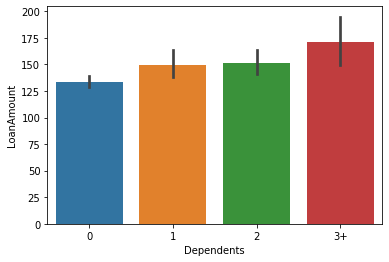

In [33]:
sns.barplot("Dependents","LoanAmount",data=data,orient="v")
#thus it can be seen evidently that Loan_Amount increases for those applicants whose dependents are more than 3

In [34]:
#filling the Loan_Amount_Term filling values
mean_1=data.Loan_Amount_Term.mean()
data.Loan_Amount_Term.fillna(mean_1,inplace=True)

In [35]:
def impute_loan_amount(cols):
    Dependents=cols[0]
    LoanAmount=cols[1]
    if pd.isnull(LoanAmount):
        if Dependents=="3+":
            return 165
        elif Dependents=="2":
            return 150
        elif Dependents=="1":
            return 140
        else:
            return 130
    else:
        return LoanAmount
        

In [36]:
data["LoanAmount"]=data[["Dependents","LoanAmount"]].apply(impute_loan_amount,axis=1)

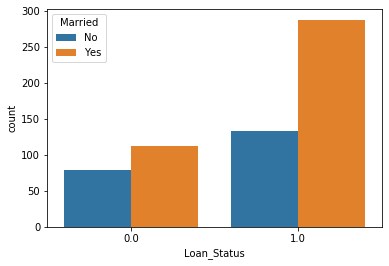

In [37]:
sns.countplot("Loan_Status",hue="Married",data=data)
#Thus it is evident those who were married had more chances of getting their loans approved

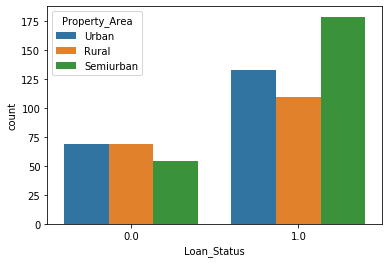

In [38]:
sns.countplot("Loan_Status",hue="Property_Area",data=data)
#those coming from semi-urban background had more chances of thier loan approved

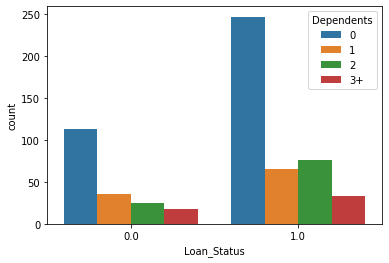

In [39]:
sns.countplot("Loan_Status",hue="Dependents",data=data)
#Those having no dependents constitute a major portion of the loan applicants whose loans were approved

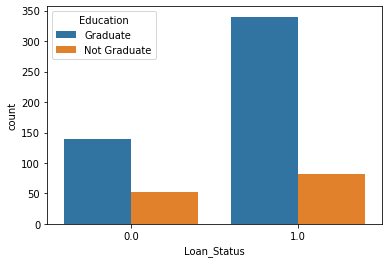

In [40]:
sns.countplot("Loan_Status",hue="Education",data=data)
#Those who are graduates had more chances of their loan approvals

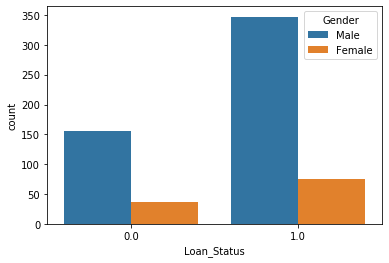

In [41]:
sns.countplot("Loan_Status",hue="Gender",data=data)

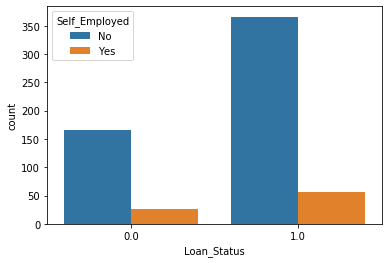

In [42]:
sns.countplot("Loan_Status",hue="Self_Employed",data=data)
#Those who were not self_employed had greater chances of loan approval

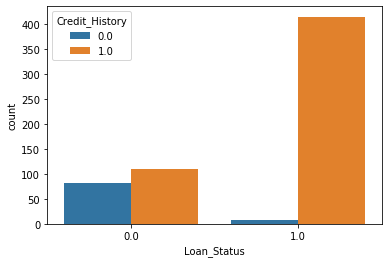

In [43]:
sns.countplot("Loan_Status",hue="Credit_History",data=data)
#Those who had credit_history of 1.0 had greater chances of getting their loans approved.

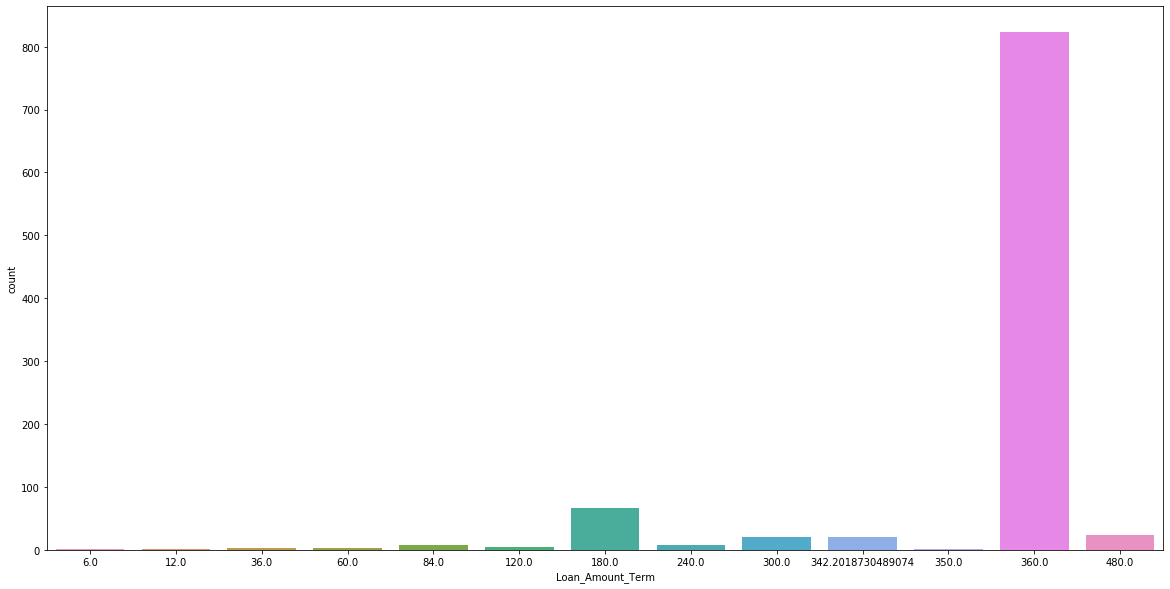

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(data["Loan_Amount_Term"])

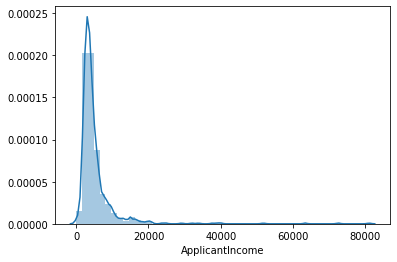

In [45]:
sns.distplot(data["ApplicantIncome"])

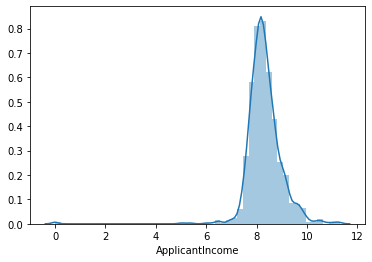

In [46]:
#Normalizing the applicant_income data
sns.distplot(np.log(data["ApplicantIncome"]+1))

In [47]:
data["ApplicantIncome"]=np.log(data["ApplicantIncome"]+1)

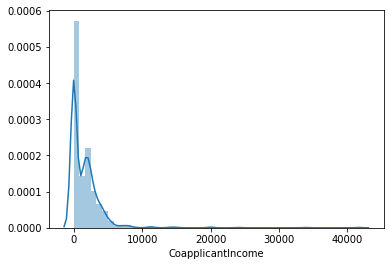

In [48]:
sns.distplot(data["CoapplicantIncome"])

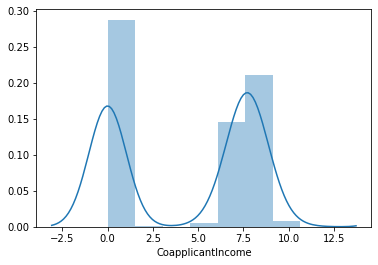

In [49]:
#Normalizing the CoapplicantIncome data
sns.distplot(np.log(data["CoapplicantIncome"]+1))

In [50]:
data["CoapplicantIncome"]=np.log(data["CoapplicantIncome"]+1)

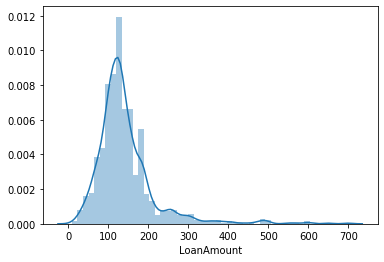

In [51]:
sns.distplot(data["LoanAmount"])

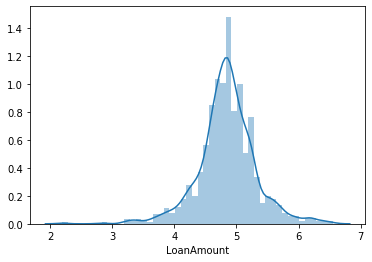

In [52]:
#Normalizing the LoanAmount data
sns.distplot(np.log(data["LoanAmount"]))

In [53]:
data["LoanAmount"]=np.log(data["LoanAmount"])

In [54]:
data.head(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,8.674197,0.000000,1.0,0,Graduate,Male,4.867534,360.0,LP001002,1.0,No,Urban,No
1,8.430327,7.319202,1.0,1,Graduate,Male,4.852030,360.0,LP001003,0.0,Yes,Rural,No
2,8.006701,0.000000,1.0,0,Graduate,Male,4.189655,360.0,LP001005,1.0,Yes,Urban,Yes
3,7.857094,7.765993,1.0,0,Not Graduate,Male,4.787492,360.0,LP001006,1.0,Yes,Urban,No
4,8.699681,0.000000,1.0,0,Graduate,Male,4.948760,360.0,LP001008,1.0,No,Urban,No


In [55]:
#Analysis
#Uptill now we have come to the following conclusions:
# Most people whose loan status were approved were males
# Most people who had applied for loans and their loans got approved were not self_employed
# Most people who applied for loans had mostly no dependents
# Most people who had gottten their loans approved were mostly married
# Most people who had gotten their loan status approved were mostly belonging to semi-urban areas
#Loan_Status mostly depended on credit_history

In [56]:
#converting categorical variables into numeric
data["Education"]=data["Education"].map({"Graduate":1,"Not Graduate":0})

In [57]:
data["Gender"]=data["Gender"].map({"Male":1,"Female":0})

In [58]:
data["Married"]=data["Married"].map({"Yes":1,"No":0})
data["Self_Employed"]=data["Self_Employed"].map({"Yes":1,"No":0})
data["Property_Area"]=data["Property_Area"].map({"Urban":1,"Rural":0,"Semiurban":2})

In [59]:
data["Dependents"]=data["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})

In [60]:
data.head(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,8.674197,0.000000,1.0,0,1,1,4.867534,360.0,LP001002,1.0,0,1,0
1,8.430327,7.319202,1.0,1,1,1,4.852030,360.0,LP001003,0.0,1,0,0
2,8.006701,0.000000,1.0,0,1,1,4.189655,360.0,LP001005,1.0,1,1,1
3,7.857094,7.765993,1.0,0,0,1,4.787492,360.0,LP001006,1.0,1,1,0
4,8.699681,0.000000,1.0,0,1,1,4.948760,360.0,LP001008,1.0,0,1,0


In [61]:
data["Total_Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [62]:
data.drop(data[["ApplicantIncome","CoapplicantIncome"]],axis=1,inplace=True)

In [63]:
# A person who is married and has dependents is most likely to have a spouse or children as dependents 
#so Creating the new feature
data["Children_or_spouse"]=np.where((data.Married==1)&(data.Dependents>0),1,0)

In [64]:
# People who are educated and self_Employed are most likely to be entreprenuers or businessman
data["Entreprenuer_or_businessman"]=np.where((data.Education==1)&(data.Self_Employed==1),1,0)
data.drop("Loan_ID",axis=1,inplace=True)

In [65]:
data.head(5)

,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,Total_Income,Children_or_spouse,Entreprenuer_or_businessman
0,1.0,0,1,1,4.867534,360.0,1.0,0,1,0,8.674197,0,0
1,1.0,1,1,1,4.852030,360.0,0.0,1,0,0,15.749530,1,0
2,1.0,0,1,1,4.189655,360.0,1.0,1,1,1,8.006701,0,1
3,1.0,0,0,1,4.787492,360.0,1.0,1,1,0,15.623087,0,0
4,1.0,0,1,1,4.948760,360.0,1.0,0,1,0,8.699681,0,0


In [66]:
df=pd.DataFrame(data[:614:])

In [67]:
df_test=pd.DataFrame(data[614::])

In [68]:
df.head(5)

,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,Total_Income,Children_or_spouse,Entreprenuer_or_businessman
0,1.0,0,1,1,4.867534,360.0,1.0,0,1,0,8.674197,0,0
1,1.0,1,1,1,4.852030,360.0,0.0,1,0,0,15.749530,1,0
2,1.0,0,1,1,4.189655,360.0,1.0,1,1,1,8.006701,0,1
3,1.0,0,0,1,4.787492,360.0,1.0,1,1,0,15.623087,0,0
4,1.0,0,1,1,4.948760,360.0,1.0,0,1,0,8.699681,0,0


In [69]:
df_test.isnull().sum()

Credit_History                   0
Dependents                       0
Education                        0
Gender                           0
LoanAmount                       0
Loan_Amount_Term                 0
Loan_Status                    367
Married                          0
Property_Area                    0
Self_Employed                    0
Total_Income                     0
Children_or_spouse               0
Entreprenuer_or_businessman      0
dtype: int64

In [70]:
df.isnull().sum()

Credit_History                 0
Dependents                     0
Education                      0
Gender                         0
LoanAmount                     0
Loan_Amount_Term               0
Loan_Status                    0
Married                        0
Property_Area                  0
Self_Employed                  0
Total_Income                   0
Children_or_spouse             0
Entreprenuer_or_businessman    0
dtype: int64

In [71]:
df_test.drop("Loan_Status",axis=1,inplace=True)

In [72]:
df_test.isnull().sum()

Credit_History                 0
Dependents                     0
Education                      0
Gender                         0
LoanAmount                     0
Loan_Amount_Term               0
Married                        0
Property_Area                  0
Self_Employed                  0
Total_Income                   0
Children_or_spouse             0
Entreprenuer_or_businessman    0
dtype: int64

In [73]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
#Using kfold cross validation
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(shuffle=True, random_state=42, n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])

In [76]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
predict_1=rfc.predict(X_test)
print(confusion_matrix(y_test,predict_1))
print(accuracy_score(y_test,predict_1))

[[ 27  34]
 [ 11 132]]
0.7794117647058824


In [77]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predict_2=lr.predict(X_test)
print(confusion_matrix(y_test,predict_2))
print(accuracy_score(y_test,predict_2))

[[ 23  38]
 [  3 140]]
0.7990196078431373


C:\Users\mashood\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [78]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predict_3=dtree.predict(X_test)
print(confusion_matrix(y_test,predict_3))
print(accuracy_score(y_test,predict_3))

[[ 33  28]
 [ 32 111]]
0.7058823529411765


In [79]:
#Using XGBClassifier
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
predict_4=xgb.predict(X_test)
print(confusion_matrix(y_test,predict_4))
print(accuracy_score(y_test,predict_4))

[[ 25  36]
 [  9 134]]
0.7794117647058824


In [80]:
#Using Catboost Classifier
from catboost import CatBoostClassifier
cbc=CatBoostClassifier()
cbc.fit(X_train,y_train)
predict_5=cbc.predict(X_test)
print(confusion_matrix(y_test,predict_5))
print(accuracy_score(y_test,predict_5))

Learning rate set to 0.00704
0:	learn: 0.6892679	total: 348ms	remaining: 5m 47s
1:	learn: 0.6851504	total: 355ms	remaining: 2m 57s
2:	learn: 0.6814942	total: 362ms	remaining: 2m
3:	learn: 0.6779110	total: 368ms	remaining: 1m 31s
4:	learn: 0.6738976	total: 375ms	remaining: 1m 14s
5:	learn: 0.6703715	total: 382ms	remaining: 1m 3s
6:	learn: 0.6666451	total: 389ms	remaining: 55.2s
7:	learn: 0.6629710	total: 395ms	remaining: 49s
8:	learn: 0.6593057	total: 400ms	remaining: 44s
9:	learn: 0.6559635	total: 404ms	remaining: 40s
10:	learn: 0.6522979	total: 408ms	remaining: 36.7s
11:	learn: 0.6487368	total: 413ms	remaining: 34s
12:	learn: 0.6457818	total: 415ms	remaining: 31.5s
13:	learn: 0.6427739	total: 419ms	remaining: 29.5s
14:	learn: 0.6397480	total: 424ms	remaining: 27.8s
15:	learn: 0.6365620	total: 428ms	remaining: 26.3s
16:	learn: 0.6335189	total: 432ms	remaining: 25s
17:	learn: 0.6304406	total: 435ms	remaining: 23.7s
18:	learn: 0.6273826	total: 438ms	remaining: 22.6s
19:	learn: 0.6243425	

182:	learn: 0.4201615	total: 1.02s	remaining: 4.55s
183:	learn: 0.4197699	total: 1.02s	remaining: 4.53s
184:	learn: 0.4190872	total: 1.02s	remaining: 4.52s
185:	learn: 0.4186093	total: 1.03s	remaining: 4.5s
186:	learn: 0.4181673	total: 1.03s	remaining: 4.48s
187:	learn: 0.4178373	total: 1.03s	remaining: 4.47s
188:	learn: 0.4172877	total: 1.04s	remaining: 4.45s
189:	learn: 0.4170355	total: 1.04s	remaining: 4.44s
190:	learn: 0.4162858	total: 1.04s	remaining: 4.42s
191:	learn: 0.4156283	total: 1.05s	remaining: 4.41s
192:	learn: 0.4149395	total: 1.05s	remaining: 4.39s
193:	learn: 0.4144438	total: 1.05s	remaining: 4.38s
194:	learn: 0.4139066	total: 1.06s	remaining: 4.36s
195:	learn: 0.4134745	total: 1.06s	remaining: 4.34s
196:	learn: 0.4131239	total: 1.06s	remaining: 4.33s
197:	learn: 0.4125994	total: 1.06s	remaining: 4.31s
198:	learn: 0.4120062	total: 1.07s	remaining: 4.3s
199:	learn: 0.4116189	total: 1.07s	remaining: 4.28s
200:	learn: 0.4112616	total: 1.07s	remaining: 4.27s
201:	learn: 0.

364:	learn: 0.3581933	total: 1.66s	remaining: 2.89s
365:	learn: 0.3579014	total: 1.66s	remaining: 2.88s
366:	learn: 0.3576772	total: 1.67s	remaining: 2.87s
367:	learn: 0.3574995	total: 1.67s	remaining: 2.87s
368:	learn: 0.3572845	total: 1.67s	remaining: 2.86s
369:	learn: 0.3571704	total: 1.68s	remaining: 2.85s
370:	learn: 0.3568584	total: 1.68s	remaining: 2.85s
371:	learn: 0.3566591	total: 1.68s	remaining: 2.84s
372:	learn: 0.3564078	total: 1.68s	remaining: 2.83s
373:	learn: 0.3561294	total: 1.69s	remaining: 2.82s
374:	learn: 0.3560538	total: 1.69s	remaining: 2.82s
375:	learn: 0.3556930	total: 1.69s	remaining: 2.81s
376:	learn: 0.3554848	total: 1.7s	remaining: 2.8s
377:	learn: 0.3553104	total: 1.7s	remaining: 2.79s
378:	learn: 0.3550978	total: 1.7s	remaining: 2.79s
379:	learn: 0.3548074	total: 1.7s	remaining: 2.78s
380:	learn: 0.3545606	total: 1.71s	remaining: 2.77s
381:	learn: 0.3543000	total: 1.71s	remaining: 2.77s
382:	learn: 0.3542041	total: 1.71s	remaining: 2.76s
383:	learn: 0.353

562:	learn: 0.3178206	total: 2.31s	remaining: 1.8s
563:	learn: 0.3177112	total: 2.32s	remaining: 1.79s
564:	learn: 0.3177076	total: 2.32s	remaining: 1.79s
565:	learn: 0.3175018	total: 2.32s	remaining: 1.78s
566:	learn: 0.3173666	total: 2.33s	remaining: 1.78s
567:	learn: 0.3172990	total: 2.33s	remaining: 1.77s
568:	learn: 0.3170577	total: 2.33s	remaining: 1.76s
569:	learn: 0.3169915	total: 2.33s	remaining: 1.76s
570:	learn: 0.3168610	total: 2.34s	remaining: 1.75s
571:	learn: 0.3166867	total: 2.34s	remaining: 1.75s
572:	learn: 0.3163947	total: 2.34s	remaining: 1.75s
573:	learn: 0.3161170	total: 2.35s	remaining: 1.74s
574:	learn: 0.3158613	total: 2.35s	remaining: 1.74s
575:	learn: 0.3158351	total: 2.35s	remaining: 1.73s
576:	learn: 0.3157080	total: 2.35s	remaining: 1.73s
577:	learn: 0.3155628	total: 2.36s	remaining: 1.72s
578:	learn: 0.3152654	total: 2.36s	remaining: 1.72s
579:	learn: 0.3150896	total: 2.36s	remaining: 1.71s
580:	learn: 0.3149876	total: 2.37s	remaining: 1.71s
581:	learn: 0

728:	learn: 0.2900841	total: 2.92s	remaining: 1.08s
729:	learn: 0.2898663	total: 2.92s	remaining: 1.08s
730:	learn: 0.2896157	total: 2.93s	remaining: 1.08s
731:	learn: 0.2893621	total: 2.93s	remaining: 1.07s
732:	learn: 0.2891781	total: 2.94s	remaining: 1.07s
733:	learn: 0.2889482	total: 2.94s	remaining: 1.07s
734:	learn: 0.2888582	total: 2.94s	remaining: 1.06s
735:	learn: 0.2887977	total: 2.95s	remaining: 1.06s
736:	learn: 0.2887064	total: 2.95s	remaining: 1.05s
737:	learn: 0.2886190	total: 2.96s	remaining: 1.05s
738:	learn: 0.2885770	total: 2.96s	remaining: 1.04s
739:	learn: 0.2884432	total: 2.96s	remaining: 1.04s
740:	learn: 0.2883472	total: 2.97s	remaining: 1.04s
741:	learn: 0.2881411	total: 2.97s	remaining: 1.03s
742:	learn: 0.2879204	total: 2.97s	remaining: 1.03s
743:	learn: 0.2877636	total: 2.98s	remaining: 1.02s
744:	learn: 0.2876371	total: 2.98s	remaining: 1.02s
745:	learn: 0.2875155	total: 2.98s	remaining: 1.02s
746:	learn: 0.2873903	total: 2.99s	remaining: 1.01s
747:	learn: 

913:	learn: 0.2600588	total: 3.57s	remaining: 336ms
914:	learn: 0.2599639	total: 3.57s	remaining: 332ms
915:	learn: 0.2597869	total: 3.58s	remaining: 328ms
916:	learn: 0.2596484	total: 3.58s	remaining: 324ms
917:	learn: 0.2594560	total: 3.58s	remaining: 320ms
918:	learn: 0.2593068	total: 3.58s	remaining: 316ms
919:	learn: 0.2592525	total: 3.59s	remaining: 312ms
920:	learn: 0.2592250	total: 3.59s	remaining: 308ms
921:	learn: 0.2590412	total: 3.59s	remaining: 304ms
922:	learn: 0.2588133	total: 3.6s	remaining: 300ms
923:	learn: 0.2585918	total: 3.6s	remaining: 296ms
924:	learn: 0.2583835	total: 3.6s	remaining: 292ms
925:	learn: 0.2582226	total: 3.6s	remaining: 288ms
926:	learn: 0.2580017	total: 3.61s	remaining: 284ms
927:	learn: 0.2578189	total: 3.61s	remaining: 280ms
928:	learn: 0.2576273	total: 3.61s	remaining: 276ms
929:	learn: 0.2574453	total: 3.62s	remaining: 272ms
930:	learn: 0.2572721	total: 3.62s	remaining: 268ms
931:	learn: 0.2571078	total: 3.62s	remaining: 264ms
932:	learn: 0.25

In [81]:
#Using Gradient boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
predict_6=gbc.predict(X_test)
print(confusion_matrix(predict_6,y_test))
print(accuracy_score(predict_6,y_test))

[[ 25   7]
 [ 36 136]]
0.7892156862745098


In [82]:
# From the above experimentations we can conclude that the two algorithms that give the best results are 
#Catboost and logistic Regression

In [83]:
#Since there are no particular hyperparameters to tune for logistic regression but still we would try to
#fine tune some parameters for logistic regression
from sklearn.model_selection import GridSearchCV
#define parameters to tune
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
#Making the hyperparameters
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grc=GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grc.fit(X_train,y_train)
predict_9=grc.predict(X_test)
print(confusion_matrix(predict_9,y_test))
print(accuracy_score(predict_9,y_test))


[[ 23   3]
 [ 38 140]]
0.7990196078431373


C:\Users\mashood\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
grc.best_params_
#as we can see that hyperparamters tuning of logistic regression did not yield any improvement
#So we would go for now hyperparameters tuning of catboost-classifier

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [88]:
grid_1 = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300],"learning_rate":[0.1,0.001,0.0001]}
grc=GridSearchCV(estimator=CatBoostClassifier(), param_grid=grid_1, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grc.fit(X_train,y_train)
predict_8=grc.predict(X_test)
print(confusion_matrix(predict_8,y_test))
print(accuracy_score(predict_8,y_test))

0:	learn: 0.6927711	total: 3.37ms	remaining: 333ms
1:	learn: 0.6924129	total: 4.75ms	remaining: 233ms
2:	learn: 0.6920792	total: 6.63ms	remaining: 214ms
3:	learn: 0.6917241	total: 7.63ms	remaining: 183ms
4:	learn: 0.6913654	total: 8.62ms	remaining: 164ms
5:	learn: 0.6909997	total: 9.64ms	remaining: 151ms
6:	learn: 0.6906717	total: 10.6ms	remaining: 141ms
7:	learn: 0.6903230	total: 11.6ms	remaining: 133ms
8:	learn: 0.6899853	total: 12.6ms	remaining: 128ms
9:	learn: 0.6896226	total: 13.9ms	remaining: 125ms
10:	learn: 0.6892817	total: 15.2ms	remaining: 123ms
11:	learn: 0.6889342	total: 16.6ms	remaining: 122ms
12:	learn: 0.6885750	total: 18.1ms	remaining: 121ms
13:	learn: 0.6882410	total: 19.1ms	remaining: 118ms
14:	learn: 0.6879080	total: 20.1ms	remaining: 114ms
15:	learn: 0.6875588	total: 21.1ms	remaining: 111ms
16:	learn: 0.6871908	total: 21.9ms	remaining: 107ms
17:	learn: 0.6868471	total: 22.9ms	remaining: 104ms
18:	learn: 0.6864771	total: 24.2ms	remaining: 103ms
19:	learn: 0.6861330	t

In [89]:
grc.best_params_

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100}

In [90]:
#Thus even after doing hyperparameters tuning of catboostclassifier, we werent able to have any sufficient effect on the accuracy
predicting_2=grc.predict(df_test)